In [19]:
# import library
import matplotlib.pyplot as plt
import numpy as np
import scipy.optimize as opt
import sklearn.linear_model
import sklearn.model_selection
import pandas as pd
import seaborn as sns

### In the assignment you should:

- Load the data and check its correctness
- Explore the basic parameters: how many data points do we have? What are the targets and what is their distribution? Any kind of exploratory data analysis is welcome
- Identify the problem: is it regression? classification?
- Identify metric you're going to use
- Design and run the experiment: train and validate your model
- Compare your results with some kind of baseline (simplest possible solution to the problem)
- (Optional) estimate feature importances and select the most important features




### load data and check its correctness

In [20]:
# 
pd_data = pd.read_csv("FINAL-data/winequality-red.csv")
nRow, nCol = pd_data.shape
print(f'Wine quality : There are {nRow} rows and {nCol} columns')

Wine quality : There are 1599 rows and 12 columns


In [21]:
# check column types
pd_data.dtypes

fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
dtype: object

### Explore the basic parameters: how many data points do we have? What are the targets and what is their distribution? 

In [22]:
# get the data description
pd_data.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [23]:
# check missing data
pd_data.isna().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [24]:
pd_data.corr()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
fixed acidity,1.000000,-0.256131,0.671703,0.114777,0.093705,-0.153794,-0.113181,0.668047,-0.682978,0.183006,-0.061668,0.124052
volatile acidity,-0.256131,1.000000,-0.552496,0.001918,0.061298,-0.010504,0.076470,0.022026,0.234937,-0.260987,-0.202288,-0.390558
citric acid,0.671703,-0.552496,1.000000,0.143577,0.203823,-0.060978,0.035533,0.364947,-0.541904,0.312770,0.109903,0.226373
residual sugar,0.114777,0.001918,0.143577,1.000000,0.055610,0.187049,0.203028,0.355283,-0.085652,0.005527,0.042075,0.013732
chlorides,0.093705,0.061298,0.203823,0.055610,1.000000,0.005562,0.047400,0.200632,-0.265026,0.371260,-0.221141,-0.128907
free sulfur dioxide,-0.153794,-0.010504,-0.060978,0.187049,0.005562,1.000000,0.667666,-0.021946,0.070377,0.051658,-0.069408,-0.050656
total sulfur dioxide,-0.113181,0.076470,0.035533,0.203028,0.047400,0.667666,1.000000,0.071269,-0.066495,0.042947,-0.205654,-0.185100
density,0.668047,0.022026,0.364947,0.355283,0.200632,-0.021946,0.071269,1.000000,-0.341699,0.148506,-0.496180,-0.174919
pH,-0.682978,0.234937,-0.541904,-0.085652,-0.265026,0.070377,-0.066495,-0.341699,1.000000,-0.196648,0.205633,-0.057731
sulphates,0.183006,-0.260987,0.312770,0.005527,0.371260,0.051658,0.042947,0.148506,-0.196648,1.000000,0.093595,0.251397


Text(0.5, 1, 'PEARSON CORRELATION')

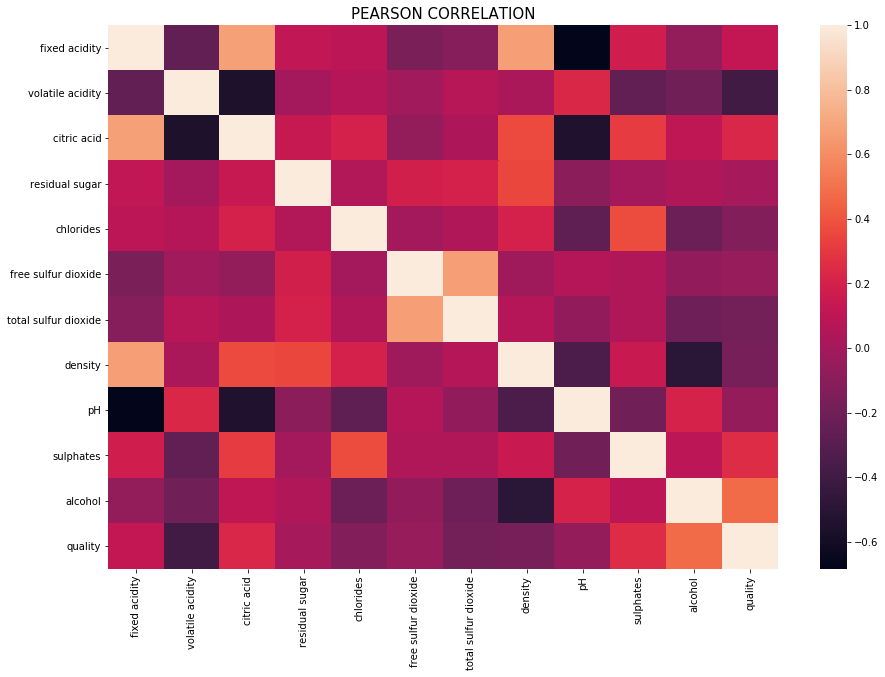

In [25]:
#PEARSON CORRELATION

plt.figure(figsize = (15,10))
sns.heatmap(pd_data.corr(method="pearson"))
plt.title('PEARSON CORRELATION', fontsize=15)

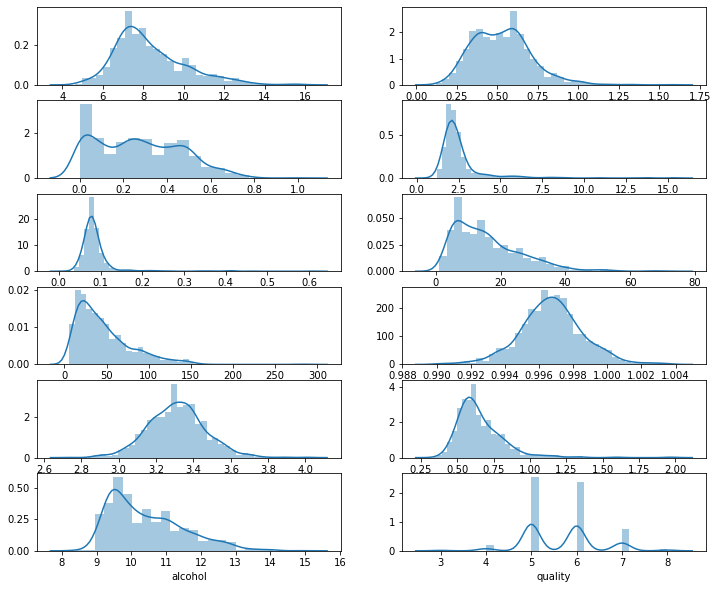

In [26]:
fig, axes = plt.subplots(nrows=6,ncols=2)
fig.set_size_inches(12, 10)
sns.distplot(pd_data["fixed acidity"],ax=axes[0][0])
sns.distplot(pd_data["volatile acidity"],ax=axes[0][1])
sns.distplot(pd_data["citric acid"],ax=axes[1][0])
sns.distplot(pd_data["residual sugar"],ax=axes[1][1])
sns.distplot(pd_data["chlorides"],ax=axes[2][0])
sns.distplot(pd_data["free sulfur dioxide"],ax=axes[2][1])
sns.distplot(pd_data["total sulfur dioxide"],ax=axes[3][0])
sns.distplot(pd_data["density"],ax=axes[3][1])
sns.distplot(pd_data["pH"],ax=axes[4][0])
sns.distplot(pd_data["sulphates"],ax=axes[4][1])
sns.distplot(pd_data["alcohol"],ax=axes[5][0])
sns.distplot(pd_data["quality"],ax=axes[5][1])

### Identify the problem: is it regression? classification?
It is a classification problem. Quality of wine can be divided into several class with only discrete numbers.

In [27]:

# remove columns with low correlation.
pd_data = pd_data.drop(["residual sugar", "free sulfur dioxide", "pH"], axis=1)


#log some columns to let them have a normal distribution
pd_data["log_total_SO2"] = np.log1p(pd_data["total sulfur dioxide"])
pd_data["log_alcohol"] = np.log1p(pd_data["alcohol"])

pd_data = pd_data.drop(["total sulfur dioxide", "alcohol", "fixed acidity"], axis=1)
pd_data.corr()

,volatile acidity,citric acid,chlorides,density,sulphates,quality,log_total_SO2,log_alcohol
volatile acidity,1.000000,-0.552496,0.061298,0.022026,-0.260987,-0.390558,0.073671,-0.201562
citric acid,-0.552496,1.000000,0.203823,0.364947,0.312770,0.226373,-0.002553,0.109106
chlorides,0.061298,0.203823,1.000000,0.200632,0.371260,-0.128907,0.060205,-0.225407
density,0.022026,0.364947,0.200632,1.000000,0.148506,-0.174919,0.104534,-0.491437
sulphates,-0.260987,0.312770,0.371260,0.148506,1.000000,0.251397,0.068751,0.093675
quality,-0.390558,0.226373,-0.128907,-0.174919,0.251397,1.000000,-0.171419,0.477002
log_total_SO2,0.073671,-0.002553,0.060205,0.104534,0.068751,-0.171419,1.000000,-0.237302
log_alcohol,-0.201562,0.109106,-0.225407,-0.491437,0.093675,0.477002,-0.237302,1.000000


In [28]:
X = pd_data.drop("quality", axis=1)
Y = pd_data["quality"]

print(X.shape)
print(Y.shape)

(1599, 7)
(1599,)


In [29]:
from imblearn.over_sampling import SMOTE
sm=SMOTE()
X,Y=sm.fit_sample(X,Y)

ModuleNotFoundError: No module named 'imblearn'

### Identify metric you're going to use
Accuracy of prediction will be the only metric of measuring classification problem.

In [30]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler
scaler = StandardScaler().fit(X)
scaled_X = scaler.transform(X)

In [31]:
from sklearn.model_selection import train_test_split

seed      = 42
test_size = 0.20

X_train, X_test, Y_train, Y_test = train_test_split(scaled_X, Y, test_size = test_size, random_state = seed)

print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(1279, 7)
(320, 7)
(1279,)
(320,)


### Design and run the experiment: train and validate your model

DecisionTree: 0.631, 0.043
Time taken for processing DecisionTree: 0:00:00.404230
KNN: 0.586, 0.064
Time taken for processing KNN: 0:00:00.937782
RandomForest: 0.696, 0.037
Time taken for processing RandomForest: 0:00:10.086917
AdaBoost: 0.543, 0.041
Time taken for processing AdaBoost: 0:00:13.794534
GradientBoost: 0.651, 0.057
Time taken for processing GradientBoost: 0:00:54.250196
XGBoost: 0.666, 0.06
Time taken for processing XGBoost: 0:01:49.729318
LGBM: 0.686, 0.043
Time taken for processing LGBM: 0:02:04.781301
GaussianNB: 0.574, 0.057
Time taken for processing GaussianNB: 0:02:04.850245
Quad: 0.572, 0.062
Time taken for processing Quad: 0:02:04.923244


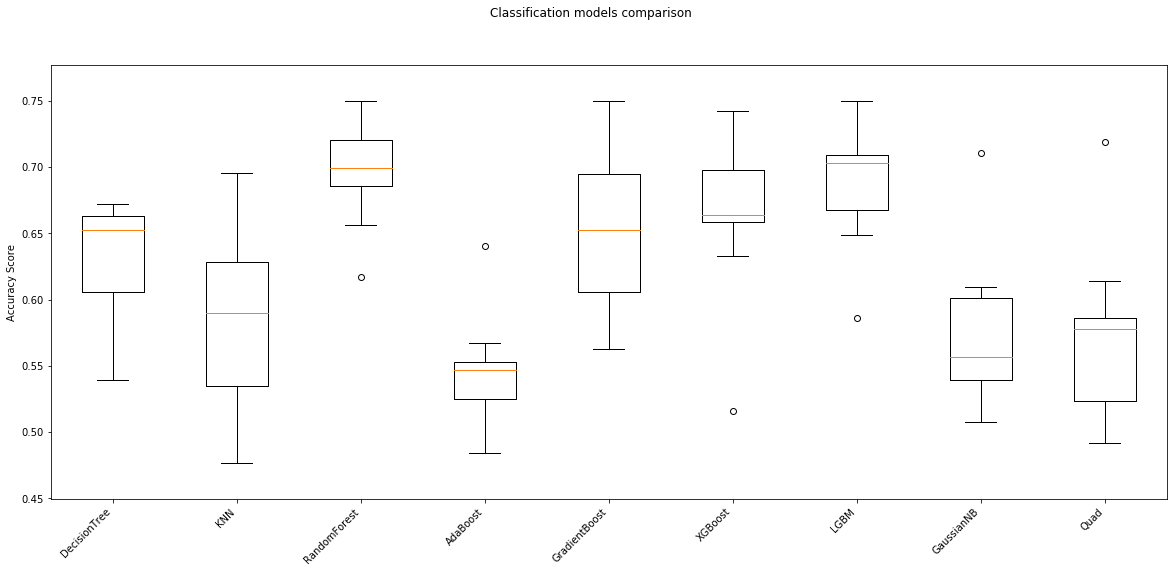

In [32]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from matplotlib.colors import ListedColormap
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_moons, make_circles, make_classification
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier

import time
import datetime

start = 0
end = 0
start = time.time()

# user variables to tune
folds   = 10

# hold different regression models in a single dictionary
models = {}
models["DecisionTree"]  = DecisionTreeClassifier()
models["KNN"]           = KNeighborsClassifier()
models["RandomForest"]  = RandomForestClassifier()
models["AdaBoost"]      = AdaBoostClassifier()
models["GradientBoost"] = GradientBoostingClassifier()
models["XGBoost"] = XGBClassifier()
models["LGBM"] = LGBMClassifier()
models["GaussianNB"] = GaussianNB()
models["Quad"] = QuadraticDiscriminantAnalysis()


# 10-fold cross validation for each model
model_results = []
model_names   = []
for model_name in models:
	model   = models[model_name]
	k_fold  = KFold(n_splits=folds, random_state=seed)
	results = cross_val_score(model, X_train, Y_train, cv=k_fold)
	
	model_results.append(results)
	model_names.append(model_name)
	print("{}: {}, {}".format(model_name, round(results.mean(), 3), round(results.std(), 3)))
	end = time.time()
	list_lapse = end - start
	print("Time taken for processing {}: {}".format(model_name, str(datetime.timedelta(seconds=list_lapse))))

# box-whisker plot to compare regression models
figure = plt.figure(figsize = (20,8))

figure.suptitle('Classification models comparison')
axis = figure.add_subplot(111)
plt.boxplot(model_results)
axis.set_xticklabels(model_names, rotation = 45, ha="right")
axis.set_ylabel("Accuracy Score")
plt.margins(0.05, 0.1)

In [33]:
# from sklearn.model_selection import RandomizedSearchCV
# model = RandomForestClassifier(random_state = 42)
# random_grid = {'bootstrap': [True, False],
#                'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None],
#                'max_features': ['auto', 'sqrt'],
#                'min_samples_leaf': [1, 2, 4],
#                'min_samples_split': [2, 5, 10],
#                'n_estimators': [130, 180, 230]}

# print('Parameters currently in use:\n')
# print(model.get_params())         


# #print random grid

# print(random_grid)

# rf_random = RandomizedSearchCV(estimator = model, param_distributions = random_grid, n_iter = 100, cv = 5, verbose=2, random_state=42, n_jobs = -1)
# # Fit the random search model
# rf_random.fit(X_train, Y_train)

# rf_random.best_params_

### Compare your results with some kind of baseline (simplest possible solution to the problem)

In [34]:
from sklearn.metrics import accuracy_score
import math
import statistics

#Predicting TEST 
model = RandomForestClassifier(random_state = 42)
model.fit(X_train, Y_train)
test_predict = model.predict(X_test)

accuracy = accuracy_score(Y_test, test_predict)
print("Prediction accuracy of RandomForest. Mean: {}, SD: {}".format(round(accuracy.mean(), 3), round(accuracy.std(), 3)))

avg_quality = round(statistics.mean(Y_test))
avg_quality_list = [avg_quality for i in range(Y_test.size)]
base_accuracy = accuracy_score(Y_test, avg_quality_list)
print("Simple prediction by taking average of all quality score. Mean: {}, SD {}".format(round(base_accuracy.mean(), 3), round(base_accuracy.std(), 3)))

Prediction accuracy of RandomForest. Mean: 0.659, SD: 0.0
Simple prediction by taking average of all quality score. Mean: 0.412, SD 0.0


0.659375
              precision    recall  f1-score   support

           3       0.00      0.00      0.00         1
           4       0.00      0.00      0.00        10
           5       0.72      0.78      0.75       130
           6       0.63      0.68      0.65       132
           7       0.57      0.48      0.52        42
           8       0.00      0.00      0.00         5

    accuracy                           0.66       320
   macro avg       0.32      0.32      0.32       320
weighted avg       0.63      0.66      0.64       320



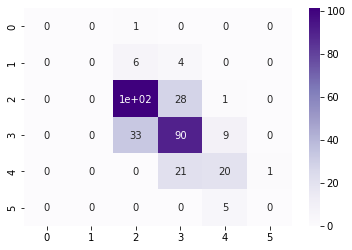

In [35]:
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
print(accuracy_score(Y_test,test_predict))
print(classification_report(Y_test,test_predict))
sns.heatmap(confusion_matrix(Y_test,test_predict),annot=True,cmap="Purples")

In [4]:
import sklearn.metrics 
real = [9,7,5,4]
prediction = [10,8,4,9]

#1,1,1,5 = 8/4 =2

print(sklearn.metrics.mean_absolute_error(real,prediction))
print(sklearn.metrics.mean_relative_error(real,prediction))



2.0


AttributeError: module 'sklearn.metrics' has no attribute 'mean_relative_error'